In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import files 
files.upload()

Saving a.csv to a (1).csv


{'a.csv': b'Date,Long,Latitude,Elevation,MaxT,MinT,Precip,Wind,RHumid,Solar\r\n1/1/2004,105.3119965,20.76320076,282,25.425,13.868,0.041198717,1.245173002,0.731083796,12.98396376\r\n1/2/2004,105.3119965,20.76320076,282,17.533,13.822,3.203200706,0.88307242,0.924475942,2.73617019\r\n1/3/2004,105.3119965,20.76320076,282,26.638,13.153,0.054931622,1.169126157,0.749412608,16.47258705\r\n1/4/2004,105.3119965,20.76320076,282,27.532,11.341,0.054931644,1.34788432,0.780918181,14.0330781\r\n1/5/2004,105.3119965,20.76320076,282,26.77,15.673,0.249767388,1.339995304,0.77021719,14.68254447\r\n1/6/2004,105.3119965,20.76320076,282,26.785,12.797,0.121879577,1.434219709,0.757889818,14.94709065\r\n1/7/2004,105.3119965,20.76320076,282,27.019,14.88,0.113296529,1.492722757,0.732752467,15.5343969\r\n1/8/2004,105.3119965,20.76320076,282,24.422,10.822,0.034332293,1.465970981,0.814514105,10.9239228\r\n1/9/2004,105.3119965,20.76320076,282,19.295,15.111,2.483939642,0.572249732,0.935104971,1.82115036\r\n1/10/2004,105

In [ ]:
df = pd.read_csv("a.csv")

In [ ]:
df.head(10)

,Date,Long,Latitude,Elevation,MaxT,MinT,Precip,Wind,RHumid,Solar
0,1/1/2004,105.311997,20.763201,282,25.425,13.868,0.041199,1.245173,0.731084,12.983964
1,1/2/2004,105.311997,20.763201,282,17.533,13.822,3.203201,0.883072,0.924476,2.736170
2,1/3/2004,105.311997,20.763201,282,26.638,13.153,0.054932,1.169126,0.749413,16.472587
3,1/4/2004,105.311997,20.763201,282,27.532,11.341,0.054932,1.347884,0.780918,14.033078
4,1/5/2004,105.311997,20.763201,282,26.770,15.673,0.249767,1.339995,0.770217,14.682544
5,1/6/2004,105.311997,20.763201,282,26.785,12.797,0.121880,1.434220,0.757890,14.947091
6,1/7/2004,105.311997,20.763201,282,27.019,14.880,0.113297,1.492723,0.732752,15.534397
7,1/8/2004,105.311997,20.763201,282,24.422,10.822,0.034332,1.465971,0.814514,10.923923
8,1/9/2004,105.311997,20.763201,282,19.295,15.111,2.483940,0.572250,0.935105,1.821150
9,1/10/2004,105.311997,20.763201,282,26.373,16.144,0.698662,1.305038,0.830618,11.024663


In [ ]:
dl = df.drop(['Date', 'Long', 'Latitude', 'Elevation', 'Precip'], axis = 1)


In [ ]:
dl.head(5)

,MaxT,MinT,Wind,RHumid,Solar
0,25.425,13.868,1.245173,0.731084,12.983964
1,17.533,13.822,0.883072,0.924476,2.736170
2,26.638,13.153,1.169126,0.749413,16.472587
3,27.532,11.341,1.347884,0.780918,14.033078
4,26.770,15.673,1.339995,0.770217,14.682544


In [ ]:

scalar = MinMaxScaler()
scalar.fit_transform(dl)
dt = scalar.transform(dl)


In [ ]:
dt

array([[0.49706458, 0.48110506, 0.16446767, 0.67784059, 0.41229373],
       [0.29385107, 0.47965766, 0.09087918, 0.921047  , 0.07209924],
       [0.52829849, 0.45860734, 0.14901292, 0.70089057, 0.52810504],
       ...,
       [0.22525492, 0.01881627, 0.07154611, 0.78261982, 0.5988492 ],
       [0.24026676, 0.01752619, 0.07747678, 0.80165523, 0.59501265],
       [0.28790298, 0.09430163, 0.11870856, 0.79070625, 0.59854794]])

In [ ]:
y = df['Precip']

In [ ]:
y

0       0.041199
1       3.203201
2       0.054932
3       0.054932
4       0.249767
          ...   
3648    0.001717
3649    0.000000
3650    0.000000
3651    0.000000
3652    0.000000
Name: Precip, Length: 3653, dtype: float64

In [ ]:
y1 = pd.DataFrame(y)

In [ ]:
y1

,Precip
0,0.041199
1,3.203201
2,0.054932
3,0.054932
4,0.249767
...,...
3648,0.001717
3649,0.000000
3650,0.000000
3651,0.000000


In [ ]:
alpha = 0.0001

In [ ]:
W = np.random.random((5, 1)) 

In [ ]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [ ]:
def derv_sigmoid(z):
    return z*(1-z)

In [ ]:
cost_hist = np.zeros((5,1))
for iter in range(5):
  z = np.dot(dt,W)
  h = sigmoid(z)
  
  error = y1-h
  dW = error*derv_sigmoid(h)
  
  W += np.dot(dt.T, dW*alpha)
  cost_hist[iter] = np.sum(error)**2

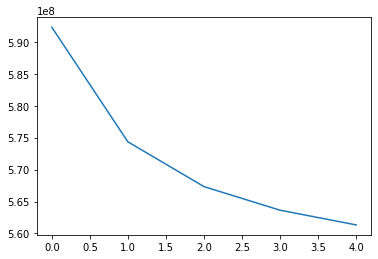

In [ ]:
plt.plot(cost_hist)

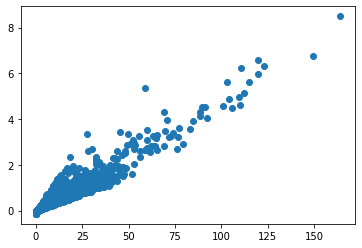

In [ ]:
plt.scatter(y, dW)
plt.show()

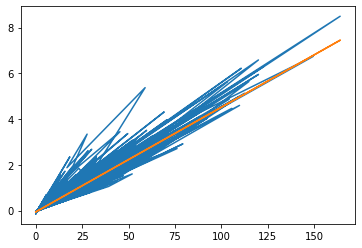

In [ ]:
plt.plot(y, dW)
m, b = np.polyfit(y, dW, 1)
plt.plot(y, m*y + b)

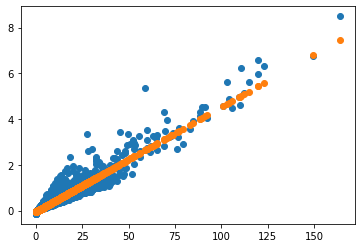

In [ ]:
plt.scatter(y, dW)
m, b = np.polyfit(y, dW, 1)
plt.scatter(y, m*y + b)